In [199]:
from pyedflib import highlevel
import numpy as np
import pandas as pd
import peakutils

In [200]:
import matplotlib.pyplot as plt

In [201]:
signals, signal_headers, header = highlevel.read_edf('Documents/Tani_eeg/edffiles/WTF48N_Baseline for Vehicle_EDF.edf')

In [202]:
np.shape(signals)

(3, 616000)

In [203]:
signals

array([[-51.29967188,  26.94226953,  22.56787891, ...,  -8.25169141,
        -10.14063281,  41.65612891],
       [ 11.53248438,  17.4975625 ,  20.28126562, ...,   0.        ,
          0.        ,   0.        ],
       [ 64.91993359,  -0.29825391,   5.76624219, ...,   0.        ,
          0.        ,   0.        ]])

In [204]:
a=signals[0]
b=signals[1]
c=signals[2]


In [205]:
Fs=2000

In [206]:
# Get frequencies for amplitudes in Hz
fft_freq = np.fft.rfftfreq(len(a), 1.0/Fs)
fft_vals = np.absolute(np.fft.rfft(a))
baseline_values = peakutils.baseline(a)
t=np.arange(len(a))

In [207]:
# Define EEG bands
eeg_bands = {'Delta': (0.5, 4),
             'Theta': (4, 8),
             'Alpha': (8, 13),
             'Beta': (13, 30),
             'Low Gamma': (30,60),
            'High Gamma': (60,100)}

In [208]:
eeg_band_fft = dict()
for band in eeg_bands:  
    freq_ix = np.where((fft_freq >= eeg_bands[band][0]) & 
                       (fft_freq <= eeg_bands[band][1]))[0]
    eeg_band_fft[band] = np.mean(fft_vals[freq_ix])

Text(0, 0.5, 'Mean band Amplitude')

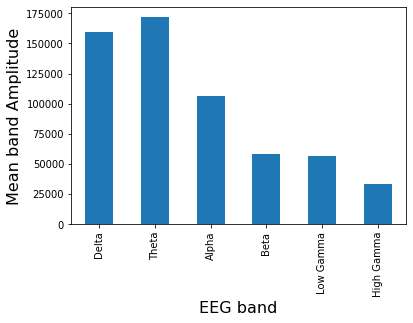

In [224]:
import pandas as pd
df = pd.DataFrame(columns=['band', 'val'])
df['band'] = eeg_bands.keys()
df['val'] = [eeg_band_fft[band] for band in eeg_bands]
ax = df.plot.bar(x='band',y='val', legend=False)
ax.set_xlabel("EEG band",size=16)
ax.set_ylabel("Mean band Amplitude",size=16)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


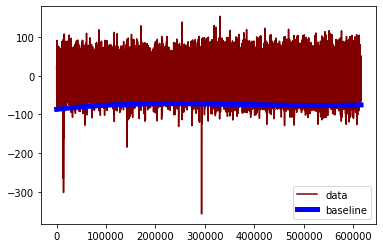

In [215]:
plt.plot(t,a,color='maroon',label='data')
plt.plot(t,baseline_values,color='blue',linewidth=5,label='baseline')
plt.legend()

In [213]:
t1=np.arange(len(fft_freq))

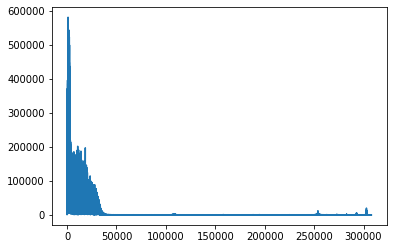

In [214]:
plt.plot(t1,fft_vals)